In [7]:
%%writefile DataSet.py
import random
import numpy as np
from PIL import Image
from os import listdir
from scipy.ndimage import imread

class DataSet():
        
    def __init__(self,nb_class,time_step, height, width, channel,dspath,classname='diff'):   
        
        self.dspath=dspath
        self.height=height
        self.width=width
        self.channel=channel
        self.time_step=time_step
        self.nb_class=nb_class
        self.seq_per_class=5
        self.classname=classname
        
        self.videos = np.empty([nb_class*self.seq_per_class, time_step, height, width, channel], dtype=np.uint8)
        self.activity = []
        vidIndex = -1
        for directory in listdir(dspath): 
            if directory[0] != '.': #Each Activity
                for vid in range(5): #Each video
                    if (self.classname=='diff'):
                        vidpath = dspath+directory+'/'+str(vid)+'/'  
                    else:
                        vidpath = dspath+classname+'/'+str(vid)+'/'
                    vidIndex += 1;
                    self.activity.append(directory)
                    for frame in range(40): #Each frame
                        framepath = vidpath+str(frame)+'rgb.png'
                        # print('[',vidIndex, frame, ']', directory)
                        print('Loading ', framepath)
                        self.videos[vidIndex, frame] = np.asarray(Image.open(framepath).resize((self.height,self.width),Image.BICUBIC), dtype=np.uint8)[:,:,:3]

        random.seed(7)
        self.reset()
    
    def get_batch(self,batch_size=5):
        # Initialisation
        videos = np.zeros([batch_size, self.time_step, self.height, self.width, self.channel], dtype=np.uint8)
        labels = []
        # Loading the batch
        for i in range(batch_size):
            if len(self.Indices): 
                ni = self.Indices.pop()
                videos[i,:,:,:,:] = self.videos[ni]
                labels.append(self.activity[ni])
        
        return videos,labels
    
    def reset(self):
        # Reset the data set before starting a new epoch
        self.Indices = list(range(3*5))
        self.size = len(self.Indices)
        random.shuffle(self.Indices)

Overwriting DataSet.py


In [2]:
time_step=40
height=160 
width=160 
channel=3
nb_class=3
imagefolderpath= ('../../P3DResNet/Data/') # Folder pathe where the video sequences are stored
ds=DataSet(nb_class,time_step, height, width, channel,imagefolderpath,'diff')

('Loading ', '../../P3DResNet/Data/hit/0/0rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/1rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/2rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/3rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/4rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/5rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/6rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/7rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/8rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/9rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/10rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/11rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/12rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/13rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/14rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/15rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/16rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/17rgb.png')
('Loading ', '../../P3DResNet/Data/hit/0/18rgb.png')
('L

('Loading ', '../../P3DResNet/Data/hit/3/39rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/0rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/1rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/2rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/3rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/4rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/5rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/6rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/7rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/8rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/9rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/10rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/11rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/12rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/13rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/14rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/15rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/16rgb.png')
('Loading ', '../../P3DResNet/Data/hit/4/17rgb.png')
('L

('Loading ', '../../P3DResNet/Data/push/3/4rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/5rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/6rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/7rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/8rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/9rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/10rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/11rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/12rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/13rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/14rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/15rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/16rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/17rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/18rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/19rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/20rgb.png')
('Loading ', '../../P3DResNet/Data/push/3/21rgb.png')
('Loading ', '../../P3DResNet/Data

('Loading ', '../../P3DResNet/Data/reach/1/38rgb.png')
('Loading ', '../../P3DResNet/Data/reach/1/39rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/0rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/1rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/2rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/3rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/4rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/5rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/6rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/7rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/8rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/9rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/10rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/11rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/12rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/13rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/14rgb.png')
('Loading ', '../../P3DResNet/Data/reach/2/15rgb.png')
('Loading ', '../../

In [3]:
vids, labels = ds.get_batch()

In [4]:
vids.shape

(5, 40, 160, 160, 3)

In [5]:
labels

['hit', 'hit', 'push', 'hit', 'push']

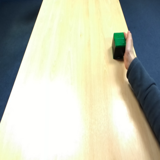

In [6]:
Image.fromarray(vids[4,10])

In [40]:
ds.reset()